# TAREA 1 BUSINESS INTELLIGENCE

## A) PROCESAMIENTO DE DATOS

No fue necesario el procesamiento previo de la data para carga al Python, para ejecutar el modelo de Clustering, dado que:

- La matriz ya contaba con nombre en cada columna y las filas estaban con datos numéricos. 
- Las variables siguen un orden lógico respecto a la variable credit_risk  (Bad=0, Good=1),  los rangos indican que a menor valor de las variables es mayor el riesgo (Bad=0), y a mayor valor de la variables es menor el riesgo (Good=1).
    Ejemplos:
    Other_deptors: 1. None (Sin garantía mayor riesgo), 2. Co-applicant (Co-Deudor riesgo medio) 3. Con garantía (Sin Riesgo)
    Telephone: 1. no (difícil de cobrar, mayor riesgo) 2. yes (comunicable para cobro=menor riesgo).
- Hay dos variables que no tiene un orden  Lógico es “purpose”, se ejecutó el  modelo con la función dummies y se eliminó la columna “duration” porque no sigue la lógica a mayor cuotas=mayor riesgo (Bad=0), en cambio está la etiqueta “installment_rate” que define los rangos de periodos según el riesgo. 
Sin embargo, concluimos que aunque la silueta mejoró de 0,806 a 0,1682, con una cantidad optima de grupos de 11, implica que es más complejo el análisis y la segmentación de los clientes, como también las estrategias de los grupos. (Se adjunta código: Tarea1_ Dummies).

Por lo tanto, se utilizó la data en su origen, ya que se realizó un trabajo previo para dejar los datos cuantitativos continuos y discretos como tal, se redondearon y los datos cualitativos binarios, nominales y ordinales fueron convertidos en números, fue adjuntada una leyenda para comprender los resultados.


### 1. Instalación e Importación de Librerías necesarias

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt



### 2. Entendimiento y carga de Datos a Python

In [ ]:
Credit = pd.read_excel('creditos_bancarios.xlsx', sheet_name='SouthGermanCredit')

CreditDesc = Credit.describe()
CreditDesc

status     duration  credit_history      purpose       amount  \
count  1000.000000  1000.000000      1000.00000  1000.000000   1000.00000   
mean      2.577000    20.903000         2.54500     2.828000   3271.24800   
std       1.257638    12.058814         1.08312     2.744439   2822.75176   
min       1.000000     4.000000         0.00000     0.000000    250.00000   
25%       1.000000    12.000000         2.00000     1.000000   1365.50000   
50%       2.000000    18.000000         2.00000     2.000000   2319.50000   
75%       4.000000    24.000000         4.00000     3.000000   3972.25000   
max       4.000000    72.000000         4.00000    10.000000  18424.00000   

           savings  employment_duration  installment_rate  \
count  1000.000000          1000.000000       1000.000000   
mean      2.105000             3.384000          2.973000   
std       1.580023             1.208306          1.118715   
min       1.000000             1.000000          1.000000   
25%       1.000000             3.000000          2.000000   
50%       1.000000             3.000000          3.000000   
75%       3.000000             5.000000          4.000000   
max       5.000000             5.000000          4.000000   

       personal_status_sex  other_debtors  ...     property         age  \
count           1000.00000    1000.000000  ...  1000.000000  1000.00000   
mean               2.68200       1.145000  ...     2.358000    35.54200   
std                0.70808       0.477706  ...     1.050209    11.35267   
min                1.00000       1.000000  ...     1.000000    19.00000   
25%                2.00000       1.000000  ...     1.000000    27.00000   
50%                3.00000       1.000000  ...     2.000000    33.00000   
75%                3.00000       1.000000  ...     3.000000    42.00000   
max                4.00000       3.000000  ...     4.000000    75.00000   

       other_installment_plans      housing  number_credits          job  \
count              1000.000000  1000.000000     1000.000000  1000.000000   
mean                  2.675000     1.928000        1.407000     2.904000   
std                   0.705601     0.530186        0.577654     0.653614   
min                   1.000000     1.000000        1.000000     1.000000   
25%                   3.000000     2.000000        1.000000     3.000000   
50%                   3.000000     2.000000        1.000000     3.000000   
75%                   3.000000     2.000000        2.000000     3.000000   
max                   3.000000     3.000000        4.000000     4.000000   

       people_liable    telephone  foreign_worker  credit_risk  
count    1000.000000  1000.000000     1000.000000  1000.000000  
mean        1.845000     1.404000        1.963000     0.700000  
std         0.362086     0.490943        0.188856     0.458487  
min         1.000000     1.000000        1.000000     0.000000  
25%         2.000000     1.000000        2.000000     0.000000  
50%         2.000000     1.000000        2.000000     1.000000  
75%         2.000000     2.000000        2.000000     1.000000  
max         2.000000     2.000000        2.000000     1.000000  

[8 rows x 21 columns]

### Análisis de los datos:

- La base de datos está compuesta por 1000 filas y 21 columnas.
- Todos los datos son el tipo númerico.
- Existen columnas con grandes dimensiones de datos, como: duration, amount and age, su std
  son 12.05, 2822.75 y 11,34 respectivamente. 
- La variable dependiente es del tipo binaria, corresponde a credit_risk, utiliza 0 y 1.
- También hay variables X binarias pero utilizan  1 y 2, como: people_liable,telephone, foreign_worker.
- Las demás variables son variables discretas que han sido transformadas a número.
- Solo existe una variable proporse que no tiene una lógica de acuerdo al riesgo.

Por lo tanto, la base no requiere mayores modificaciones, peso si se debe normalizar



### 3. Preparación y Preproceso del Dataset

##### Estandarizacion del Dataset

In [ ]:
Scaler = StandardScaler()          
CreditEst = pd.DataFrame(Scaler.fit_transform(Credit),columns = Credit.columns, index =Credit.index)  # código pra realizar el escalamiento de los datos de la base Credit
CreditEstD= CreditEst.describe()
CreditEstD

status      duration  credit_history       purpose        amount  \
count  1.000000e+03  1.000000e+03    1.000000e+03  1.000000e+03  1.000000e+03   
mean  -1.387335e-15  4.856116e-16   -1.190381e-15  1.168510e-16 -4.218847e-17   
std    1.000500e+00  1.000500e+00    1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.254566e+00 -1.402415e+00   -2.350870e+00 -1.030963e+00 -1.070856e+00   
25%   -1.254566e+00 -7.386675e-01   -5.034280e-01 -6.664074e-01 -6.754762e-01   
50%   -4.590262e-01 -2.408572e-01   -5.034280e-01 -3.018519e-01 -3.373390e-01   
75%    1.132053e+00  2.569531e-01    1.344014e+00  6.270354e-02  2.484642e-01   
max    1.132053e+00  4.239436e+00    1.344014e+00  2.614592e+00  5.370764e+00   

            savings  employment_duration  installment_rate  \
count  1.000000e+03         1.000000e+03      1.000000e+03   
mean   2.535749e-16         2.662315e-16      1.003531e-15   
std    1.000500e+00         1.000500e+00      1.000500e+00   
min   -6.997070e-01        -1.973997e+00     -1.764514e+00   
25%   -6.997070e-01        -3.179592e-01     -8.701833e-01   
50%   -6.997070e-01        -3.179592e-01      2.414692e-02   
75%    5.667310e-01         1.338078e+00      9.184772e-01   
max    1.833169e+00         1.338078e+00      9.184772e-01   

       personal_status_sex  other_debtors  ...      property           age  \
count         1.000000e+03   1.000000e+03  ...  1.000000e+03  1.000000e+03   
mean          3.624878e-16  -1.610934e-16  ...  1.054712e-18 -1.625922e-16   
std           1.000500e+00   1.000500e+00  ...  1.000500e+00  1.000500e+00   
min          -2.376626e+00  -3.036857e-01  ... -1.293723e+00 -1.457831e+00   
25%          -9.636499e-01  -3.036857e-01  ... -1.293723e+00 -7.527986e-01   
50%           4.493265e-01  -3.036857e-01  ... -3.410551e-01 -2.240241e-01   
75%           4.493265e-01  -3.036857e-01  ...  6.116128e-01  5.691376e-01   
max           1.862303e+00   3.885083e+00  ...  1.564281e+00  3.477397e+00   

       other_installment_plans       housing  number_credits           job  \
count             1.000000e+03  1.000000e+03    1.000000e+03  1.000000e+03   
mean              4.517497e-16  6.486478e-16   -6.283862e-17  2.590983e-16   
std               1.000500e+00  1.000500e+00    1.000500e+00  1.000500e+00   
min              -2.375050e+00 -1.751205e+00   -7.049260e-01 -2.914492e+00   
25%               4.608307e-01  1.358694e-01   -7.049260e-01  1.469492e-01   
50%               4.608307e-01  1.358694e-01   -7.049260e-01  1.469492e-01   
75%               4.608307e-01  1.358694e-01    1.027079e+00  1.469492e-01   
max               4.608307e-01  2.022944e+00    4.491089e+00  1.677670e+00   

       people_liable     telephone  foreign_worker   credit_risk  
count   1.000000e+03  1.000000e+03    1.000000e+03  1.000000e+03  
mean    3.105294e-16 -1.432188e-17   -1.129541e-15  3.939959e-15  
std     1.000500e+00  1.000500e+00    1.000500e+00  1.000500e+00  
min    -2.334869e+00 -8.233179e-01   -5.101669e+00 -1.527525e+00  
25%     4.282896e-01 -8.233179e-01    1.960143e-01 -1.527525e+00  
50%     4.282896e-01 -8.233179e-01    1.960143e-01  6.546537e-01  
75%     4.282896e-01  1.214598e+00    1.960143e-01  6.546537e-01  
max     4.282896e-01  1.214598e+00    1.960143e-01  6.546537e-01  

[8 rows x 21 columns]

##### Análisis de los resultados
Se puede observar en CreditNorm, que todas las variables fueron normalizadas sus desviaciones son cercana a 1.
Como ejemplo la variable amount registra un promedio en su origen de 3271.25 y Desviación 2822.75,
en comparación a su escalamiento que registra un promedio de -4,21 y desviación 1.0005

# B) Determinación óptima de número de clusters

Para determinar el grupo óptimo de clusters se utilizaron 3 métodos para comparar:
- El primer método: fue asignar el número de clusters directamente a la función kmeans, 4 y 5, las siluetas fueron de 0,07083 y 0,08206, cabe señalar que se aplicó un random para poder comparar los resultados de los distintos códigos realizados por lo 4 integrantes del grupo.
- Segundo método: análisis del codo, este método es impreciso porque solo se puede visualizar el punto de inflexión o curvatura del codo, y estimar el rango donde se encuentra el grupo óptimo.
- Y por último el método de la silueta, en este caso su designó un numero de loops de 20 para obtener la mejor silueta, además fue gráfica de la silueta para verificar el grupo Optimo.
En conclusión, el grupo optimo es de 5 y fue verificado por el método de la silueta, cuyo índice fue de 0,08206.


### 4. Set-Up del Modelo seleccionado

##### a) METODO ASIGNACION  K=4

Modelo de clustering kmeans k=4

In [ ]:
modelo_clustering4 = KMeans(n_clusters=4, random_state=10, n_init=10).fit(CreditEst)
etiquetas4=modelo_clustering4.predict(CreditEst)


Evaluación de los Cluster K=4

In [ ]:
silueta4=silhouette_score(CreditEst, modelo_clustering4.labels_,metric='euclidean')
print(silueta4)

0.07083223238449964


 METODO ASIGNACION DE K=5

Modelo de clustering kmeans k=5

In [ ]:
modelo_clustering5 = KMeans(n_clusters=5, random_state=10, n_init=10).fit(CreditEst)

etiquetas5=modelo_clustering5.predict(CreditEst)


Evaluación de los Cluster k=5

In [ ]:
silueta5=silhouette_score(CreditEst, modelo_clustering5.labels_,metric='euclidean')
print(silueta5)


0.0820644381653513


##### Análisis de resultado

El metodo de asignación, es un modelo impreciso los modelos son definidos, 
pero no necesariamente son los optimos. Además cada vez que se ejecuta,
la silueta varia, esto esta dado porque toma distintas variables para determinar los grupos
una forma de evitar este tema y comprobar con los modelos es realizar el random

##### b) METODO DEL CODO

Definición de los clúster

In [ ]:
distorsionsCodo = []
max_loopcodo=20
for k in range(2, max_loopcodo):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(CreditEst)
    distorsionsCodo.append(kmeans.inertia_)

Gráfico del Codo  

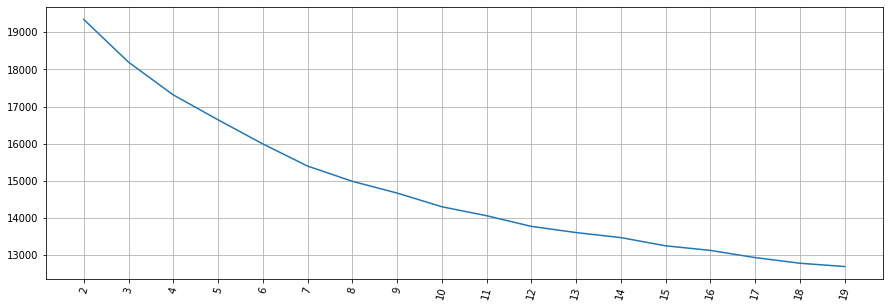

In [ ]:
figCodo = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loopcodo), distorsionsCodo)
plt.xticks([i for i in range(2, max_loopcodo)], rotation=75)
plt.grid(True)

###### Análisis del Método

Este método se analiza gráficamente, por lo que también puede inducir a error, sin embargo
da un rango aproximado donde puede estar ubicado el cluster óptimo.


###### c) METODO SILUETA

Definición de los Clúster a probar

In [ ]:
max_loopS = 20 
Silueta_Score = []
Silueta_Score2 = []
for i in range(2,max_loopS):
    Kmeans_M0 = KMeans(n_clusters=i, random_state=10, n_init=10)   #lo tengo calculado por separado **   
    Kmeans_M0.fit(CreditEst)
    Clusters_M0 = Kmeans_M0.labels_ 
    Clusters_M0 = pd.DataFrame(Clusters_M0,columns=['etiqueta_cluster']) 
    # Evaluación de la siluetas de los cluster
    siluetas = silhouette_score(CreditEst, Kmeans_M0.labels_, metric='euclidean', random_state=10)
    Silueta_Score.append(siluetas)
    Silueta_Score2.append([i,Clusters_M0,siluetas])
    print("Cluster: "+str(i))
    print("Silueta: "+str(siluetas))

Cluster: 2
Silueta: 0.07876049986683717
Cluster: 3
Silueta: 0.07342758490868716
Cluster: 4
Silueta: 0.07083223238449964
Cluster: 5
Silueta: 0.0820644381653513
Cluster: 6
Silueta: 0.06827720805819651
Cluster: 7
Silueta: 0.07243097110002375
Cluster: 8
Silueta: 0.06860897185778785
Cluster: 9
Silueta: 0.07138238173458057
Cluster: 10
Silueta: 0.06702819462984994
Cluster: 11
Silueta: 0.06449328421728977
Cluster: 12
Silueta: 0.06734042455470034
Cluster: 13
Silueta: 0.06464225968261685
Cluster: 14
Silueta: 0.06525836733209403
Cluster: 15
Silueta: 0.06840065669681367
Cluster: 16
Silueta: 0.07027899429081876
Cluster: 17
Silueta: 0.06701890645360226
Cluster: 18
Silueta: 0.06165897999371943
Cluster: 19
Silueta: 0.06694930833290824


Gráfico de la Silueta

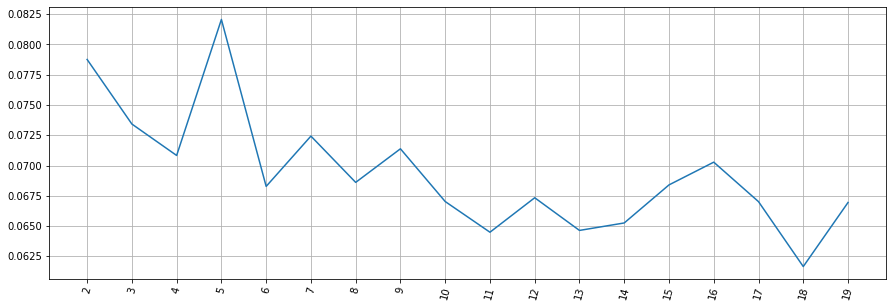

In [ ]:
figSilu = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loopS), Silueta_Score)
plt.xticks([k for k in range(2, max_loopS)], rotation=75)
plt.grid(True)  



###### Análisis del Modelo

Este es uno de los modelos que permite obtener el número de cluster óbtimo, en este caso corresponde a
5 cluster con una silueta de 0,082, ahora bien, este numero es más cercano a cero por lo que no sigue habiendo
un cruce de datos entre los cluster.

In [ ]:
ModeloCasteringS =KMeans(n_clusters=i, random_state=10, n_init=10).fit(CreditEst) 
ch = calinski_harabasz_score(CreditEst, ModeloCasteringS.labels_)   
ch 

36.354471727260915

###  5. Selección Cluster Optimo

In [ ]:
Cluster_Optimos = Silueta_Score2[3][1]
#Cluster_Optimos.to_excel('Cluster_OptimosCreditoptimo.xlsx') para comprobar
Resultado_Optimo = pd.concat([Cluster_Optimos, Credit],axis=1)
Resultado_Optimo.to_excel('resultado_clusteringCreditoptimo.xlsx')

# C) La estadistica Descriptiva de los segmentos, nombres que serán asignados

### 6. Obtención y Evaluación de métricas

In [ ]:
Resultado_OptimoDesc = Resultado_Optimo.describe()
Resultado_OptimoDesc

etiqueta_cluster       status     duration  credit_history  \
count       1000.000000  1000.000000  1000.000000      1000.00000   
mean           2.211000     2.577000    20.903000         2.54500   
std            1.423554     1.257638    12.058814         1.08312   
min            0.000000     1.000000     4.000000         0.00000   
25%            1.000000     1.000000    12.000000         2.00000   
50%            2.000000     2.000000    18.000000         2.00000   
75%            4.000000     4.000000    24.000000         4.00000   
max            4.000000     4.000000    72.000000         4.00000   

           purpose       amount      savings  employment_duration  \
count  1000.000000   1000.00000  1000.000000          1000.000000   
mean      2.828000   3271.24800     2.105000             3.384000   
std       2.744439   2822.75176     1.580023             1.208306   
min       0.000000    250.00000     1.000000             1.000000   
25%       1.000000   1365.50000     1.000000             3.000000   
50%       2.000000   2319.50000     1.000000             3.000000   
75%       3.000000   3972.25000     3.000000             5.000000   
max      10.000000  18424.00000     5.000000             5.000000   

       installment_rate  personal_status_sex  ...     property         age  \
count       1000.000000           1000.00000  ...  1000.000000  1000.00000   
mean           2.973000              2.68200  ...     2.358000    35.54200   
std            1.118715              0.70808  ...     1.050209    11.35267   
min            1.000000              1.00000  ...     1.000000    19.00000   
25%            2.000000              2.00000  ...     1.000000    27.00000   
50%            3.000000              3.00000  ...     2.000000    33.00000   
75%            4.000000              3.00000  ...     3.000000    42.00000   
max            4.000000              4.00000  ...     4.000000    75.00000   

       other_installment_plans      housing  number_credits          job  \
count              1000.000000  1000.000000     1000.000000  1000.000000   
mean                  2.675000     1.928000        1.407000     2.904000   
std                   0.705601     0.530186        0.577654     0.653614   
min                   1.000000     1.000000        1.000000     1.000000   
25%                   3.000000     2.000000        1.000000     3.000000   
50%                   3.000000     2.000000        1.000000     3.000000   
75%                   3.000000     2.000000        2.000000     3.000000   
max                   3.000000     3.000000        4.000000     4.000000   

       people_liable    telephone  foreign_worker  credit_risk  
count    1000.000000  1000.000000     1000.000000  1000.000000  
mean        1.845000     1.404000        1.963000     0.700000  
std         0.362086     0.490943        0.188856     0.458487  
min         1.000000     1.000000        1.000000     0.000000  
25%         2.000000     1.000000        2.000000     0.000000  
50%         2.000000     1.000000        2.000000     1.000000  
75%         2.000000     2.000000        2.000000     1.000000  
max         2.000000     2.000000        2.000000     1.000000  

[8 rows x 22 columns]

In [ ]:
Resultado_Optimo_por_cluster = Resultado_Optimo.groupby('etiqueta_cluster').mean()
Resultado_Optimo_por_cluster

status   duration  credit_history   purpose       amount  \
etiqueta_cluster                                                               
0                 2.166667  38.080247        2.302469  3.419753  7795.722222   
1                 2.372093  20.294574        2.108527  3.542636  2759.728682   
2                 2.278552  16.520891        2.111421  2.387187  2187.980501   
3                 2.361111  11.638889        2.777778  1.000000  2396.750000   
4                 3.238854  18.363057        3.318471  2.942675  2485.885350   

                   savings  employment_duration  installment_rate  \
etiqueta_cluster                                                    
0                 2.037037             3.302469          2.703704   
1                 2.108527             3.372093          3.093023   
2                 1.674095             2.885794          2.880223   
3                 2.222222             3.250000          2.472222   
4                 2.617834             4.015924          3.226115   

                  personal_status_sex  other_debtors  ...  property  \
etiqueta_cluster                                      ...             
0                            2.685185       1.092593  ...  3.148148   
1                            2.751938       1.178295  ...  2.542636   
2                            2.607242       1.194986  ...  1.988858   
3                            2.972222       1.500000  ...  1.638889   
4                            2.703822       1.060510  ...  2.378981   

                        age  other_installment_plans   housing  \
etiqueta_cluster                                                 
0                 36.191358                 2.753086  2.203704   
1                 35.945736                 1.085271  2.015504   
2                 29.696379                 2.963788  1.715877   
3                 36.472222                 2.750000  1.694444   
4                 41.617834                 2.949045  2.019108   

                  number_credits       job  people_liable  telephone  \
etiqueta_cluster                                                       
0                       1.388889  3.308642       1.833333   1.691358   
1                       1.472868  2.837209       1.736434   1.379845   
2                       1.150418  2.754875       1.894150   1.208914   
3                       1.361111  2.555556       1.694444   1.194444   
4                       1.687898  2.933121       1.856688   1.512739   

                  foreign_worker  credit_risk  
etiqueta_cluster                               
0                       1.993827     0.401235  
1                       2.000000     0.589147  
2                       2.000000     0.651811  
3                       1.000000     0.916667  
4                       2.000000     0.929936  

[5 rows x 21 columns]

### 7.  Segmentación de los grupos y determinación de los nombres

#### Cluster 0
Son clientes con mayor riesgo, dado que tienen montos de crédito más altos, en promedio de 7.796 MD y también más largos en promedio 38,08 meses de plazo, su edad es de 36 años en promedio, el 79% cuenta con bienes raíces o participa en sociedades, el 92,58% son gerentes o empleados altamente calificados, el 92,59% posee créditos en otros Bancos.
##### Nombre comercial: Emprendedores


#### Cluster 1 
Clientes con segundo mejor salario, un 54% son empleados calificados o funcionarios, mayoría el 95% ha tenido hasta 2 créditos, su crédito promedio es 2.760 MD, el 72% la vivienda es rentada, edad promedio 35,95, la mayoría no tiene obligación financiera con otras entidades (91%) y menor número con las casas comerciales, en general su nivel de riesgo es bueno.
##### Nombre comercial: Clientes dependientes calificados

#### Cluster 2
Principalmente son 43% Mujeres no solteras y 38% de hombres casados, con un promedio de 30 años, principalmente tienen un solo crédito (84%) y solo un 3,6% en créditos con otras tiendas u otro tipo de negocios.  Otras características de este grupo son: El 72% no tienen cuenta corriente, principalmente utilizan los créditos para compra de equipamiento para el hogar (muebles y otros), la duración de su empleo está entre 1 y 4 años, en promedio están entre 1 y 4 años en su vivienda, el 30% vive con algún familiar y el 68% la arrienda, son empleados con algún tipo de calificación, son clientes potencialmente rentables, y tienen una buena evaluación de riesgo.
##### Nombre comercial: Jóvenes Calificados no propietarios 

#### Cluster 3
Hombres casados o divorciados corresponden a un 72%, la mayoría tiene máximo de 2 créditos (94%), su nivel de riesgo es bueno, el 89% es un empleado calificado, un buen pagador de sus créditos, tiene un auto nuevo,  el 54% cuenta con ahorros menores a 100 DM, el 72% arrienda donde vive, tiene aval, tiene un auto u otro propiedad, su edad promedio de 37 años, no tiene deudas en ninguna otra institución, tiene de 0 a 2 personas a cargo, si tiene teléfono y mayormente  extranjero.
##### Nombre comercial: Cliente extranjero

#### Cluster 4
Corresponde al 31% del total de la cartera de clientes, muy bajo riesgo de impago, los montos promedio su crédito es de 2.486 DM, su edad es de 41 años en promedio, el 72% es casado o viudo, registran los mayores ahorros un 54% posee más de 100 DM, el 64% tiene un salario superior 200 DM, el 81% arrienda su vivienda, el 61% ha solicitado más de 4 créditos, el 91% tiene una permanencia en su trabajo sobre 3 años.
##### Nombre comercial: Clientes Preferenciales

## D) Acciones de negocios que podrían ser relevantes a sugerir para los segmentos definidos

#### Cluster 0 Emprendedores
Debido a que es un segmento más riesgoso, según las características del cliente ofrecer reestructuración de deudas, financiamiento capital de trabajo de la empresa, financiamiento de nuevos proyectos, servicios de pagos electrónicos empleados y proveedores,.

#### Cluster 1 Clientes dependientes calificados
●	Ampliar su línea de crédito, otorgarle crédito para el cumplimiento de su objetivo, incentivar el ahorro en la institución.

#### Cluster 2 Jóvenes Calificados no propietarios
●	Debido a que son hombre o mujeres con algún tipo de calificación laboral, ya llevan más de un año en sus trabajos, principalmente tienen un solo crédito y no es para un bien inmueble y además no tiene ningún bien raíz asociado a su persona, se debe tener como posibles tomadores de créditos de largo plazo, para bienes raíces. Cliente potenciales, mantener bajas líneas de crédito, préstamos de montos bajos y plazos cortos.

#### Cluster 3 Cliente extranjero
●	Como es un buen pagador y nivel de riesgo es bueno, le ofrecería crédito hipotecario, para poder tener su casa propia, ya que solo cuenta con auto, y también ofrecer crédito para cambiar auto por uno nuevo.

#### Cluster 4 Clientes Preferenciales
•	Ofrecer servicios de asesoría financiera para atraer nuevos capitales del 45% que no tiene ahorro en el Banco. Generar plan de beneficios especiales por ser cliente premium, ofrecer un segundo hipotecario para compra de parcela de agrado o segunda vivienda.


## Pregunta Bonus: ¿Qué características tienen los malos pagadores en comparación con los buenos?

Los malos pagadores corresponden a un 30% de la cartera, registran créditos en promedio de 3.938 DM 32% superior a los buenos pagadores, además la duración del crédito es de 24,86 y los buenos pagadores es de 19,21 mes, han tenido menos créditos en el banco, el 72% no posee ahorros en el banco, tienen poco historial crediticio, no tiene cuenta corriente o está en 0. Su promedio de edad es de 34 años.  